In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("Set2")

plasma_palette=sns.color_palette("plasma")
cool_palette=sns.color_palette("cool")
viridis_palette=sns.color_palette("viridis")
inferno_palette=sns.color_palette("inferno")
icefire_palette=sns.color_palette("icefire")
icefire_r_palette=sns.color_palette("icefire_r")
mako_palette=sns.color_palette("mako")

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [368]:
uci=pd.read_csv("Dataset/heart_disease_uci.csv")
uci.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [369]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [370]:
uci.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Convet num to 0 and 1 only

In [371]:
uci["num"]=uci["num"].apply(lambda x:1 if x>=1 else 0)
uci.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [372]:
uci.drop("dataset",axis=1,inplace=True)

# Missing values

In [373]:
uci.isna().sum().sort_values()

id            0
age           0
sex           0
cp            0
num           0
restecg       2
chol         30
thalch       55
exang        55
trestbps     59
oldpeak      62
fbs          90
slope       309
thal        486
ca          611
dtype: int64

## Drop columns where it has 5% of data missimg value or less

In [374]:
threshold=len(uci)*0.05

In [375]:
threshold

46.0

In [376]:
cols_to_drop=uci.columns[uci.isna().sum()<threshold]
cols_to_drop

Index(['id', 'age', 'sex', 'cp', 'chol', 'restecg', 'num'], dtype='object')

In [377]:
uci.dropna(subset=cols_to_drop,inplace=True)

In [378]:
uci.isna().sum().sort_values()

id            0
age           0
sex           0
cp            0
chol          0
restecg       0
num           0
thalch       52
exang        52
trestbps     56
oldpeak      59
fbs          89
slope       286
thal        456
ca          580
dtype: int64

In [379]:
uci.drop("id",axis=1,inplace=True)

### Impute the numeric feature with Mean and the categorical with mode

In [380]:
numeric_features=uci.select_dtypes(["int","float"]).columns
numeric_features=numeric_features[[0,1,2,3,4]]
numeric_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [381]:
ca_index=pd.Index(["ca"])
cat_features=uci.select_dtypes(["object"]).columns
cat_features=cat_features.append(ca_index)

In [382]:
cat_features

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca'], dtype='object')

In [383]:
X_cat=uci[cat_features].values
X_num=uci[numeric_features].values
y=uci["num"].values

In [384]:
X_num_train,X_num_val,y_train,y_val=train_test_split(X_num,y,test_size=0.2,random_state=42)
X_cat_train,X_cat_val,y_train,y_val=train_test_split(X_cat,y,test_size=0.2,random_state=42)

In [385]:
X_cat_train.shape,X_cat_val.shape,y_train.shape,y_val.shape

((710, 8), (178, 8), (710,), (178,))

In [386]:
X_num_train.shape,X_num_val.shape,y_train.shape,y_val.shape

((710, 5), (178, 5), (710,), (178,))

In [387]:
cat_imputer=SimpleImputer(strategy="most_frequent")
X_cat_train=cat_imputer.fit_transform(X_cat_train)
X_cat_val=cat_imputer.transform(X_cat_val)

In [388]:
num_imputer=SimpleImputer()
X_num_train=num_imputer.fit_transform(X_num_train)
X_num_val=num_imputer.transform(X_num_val)

In [389]:
X_train=np.append(X_cat_train,X_num_train,axis=1)
X_val=np.append(X_cat_val,X_num_val,axis=1)

In [390]:
y_train.shape,y_val.shape

((710,), (178,))

In [391]:
X_train.shape,X_val.shape

((710, 13), (178, 13))

In [392]:
X=np.append(X_train,X_val,axis=0)
X.shape

(888, 13)

In [393]:
y=np.append(y_train,y_val)
y.shape

(888,)

In [394]:
data=np.column_stack((X,y))
data.shape

(888, 14)

In [395]:
cols_name=list(cat_features)+list(numeric_features)
cols_name

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'thal',
 'ca',
 'age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak']

In [396]:
uci_imputed=pd.DataFrame(data=data,columns=cols_name+["num"])
uci_imputed

,sex,cp,fbs,restecg,exang,slope,thal,ca,age,trestbps,chol,thalch,oldpeak,num
0,Male,asymptomatic,False,normal,True,flat,normal,0.0,62.0,110.0,0.0,120.0,0.5,1
1,Male,atypical angina,False,normal,False,upsloping,normal,0.0,42.0,120.0,295.0,162.0,0.0,0
2,Female,atypical angina,False,normal,False,upsloping,normal,0.0,47.0,140.0,257.0,135.0,1.0,0
3,Male,non-anginal,False,st-t abnormality,False,flat,normal,0.0,35.0,132.316891,161.0,136.813433,0.871192,0
4,Male,asymptomatic,True,st-t abnormality,False,flat,reversable defect,0.0,65.0,160.0,0.0,122.0,0.871192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Female,atypical angina,False,st-t abnormality,False,flat,normal,0.0,54.0,140.0,309.0,140.0,0.0,0
884,Male,non-anginal,False,normal,False,flat,normal,0.0,49.0,132.316891,142.0,136.813433,0.871192,1
885,Female,non-anginal,False,normal,False,flat,normal,0.0,50.0,120.0,219.0,158.0,1.6,0
886,Male,atypical angina,False,normal,False,upsloping,normal,0.0,52.0,120.0,325.0,172.0,0.2,0


In [397]:
uci_imputed.isna().sum()

sex         0
cp          0
fbs         0
restecg     0
exang       0
slope       0
thal        0
ca          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
num         0
dtype: int64

- finally we have no missing values :)

In [398]:
uci_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       888 non-null    object
 1   cp        888 non-null    object
 2   fbs       888 non-null    object
 3   restecg   888 non-null    object
 4   exang     888 non-null    object
 5   slope     888 non-null    object
 6   thal      888 non-null    object
 7   ca        888 non-null    object
 8   age       888 non-null    object
 9   trestbps  888 non-null    object
 10  chol      888 non-null    object
 11  thalch    888 non-null    object
 12  oldpeak   888 non-null    object
 13  num       888 non-null    object
dtypes: object(14)
memory usage: 97.2+ KB


In [399]:
uci_imputed["age"]=uci_imputed["age"].astype("int")
uci_imputed["trestbps"]=uci_imputed["trestbps"].astype("float")
uci_imputed["chol"]=uci_imputed["chol"].astype("float")
uci_imputed["thalch"]=uci_imputed["thalch"].astype("float")
uci_imputed["oldpeak"]=uci_imputed["oldpeak"].astype("float")
uci_imputed["num"]=uci_imputed["num"].astype("int")

In [400]:
uci_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       888 non-null    object 
 1   cp        888 non-null    object 
 2   fbs       888 non-null    object 
 3   restecg   888 non-null    object 
 4   exang     888 non-null    object 
 5   slope     888 non-null    object 
 6   thal      888 non-null    object 
 7   ca        888 non-null    object 
 8   age       888 non-null    int32  
 9   trestbps  888 non-null    float64
 10  chol      888 non-null    float64
 11  thalch    888 non-null    float64
 12  oldpeak   888 non-null    float64
 13  num       888 non-null    int32  
dtypes: float64(4), int32(2), object(8)
memory usage: 90.3+ KB


# Handling outliers

In [401]:
numeric_features=uci_imputed.select_dtypes(["int","float"]).columns
numeric_features

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

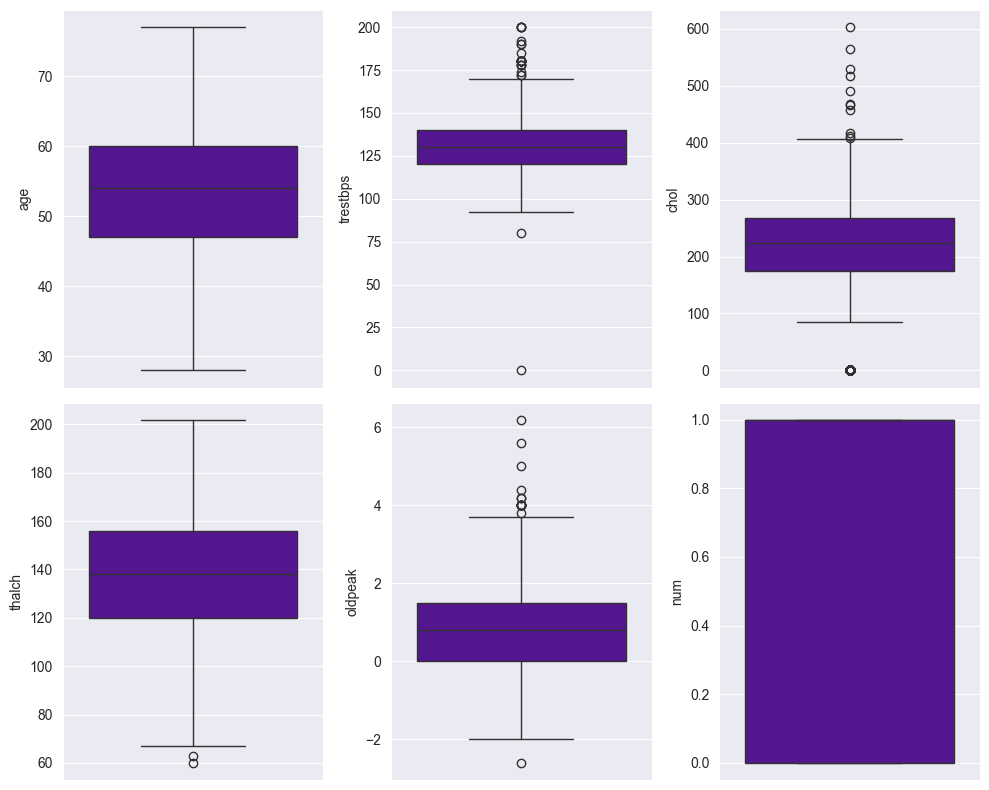

In [402]:
plt.figure(figsize=(10,8))
for idx,label in enumerate(numeric_features):
    plt.subplot(2,3,idx+1)
    sns.boxplot(y=uci_imputed[label],data=uci_imputed,palette=plasma_palette)
plt.tight_layout()
plt.show()

- Here we will rempve the outlier from chol

In [403]:
def outlier(series:pd.Series)->float:
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    mask=(series<=upper_bound)&(series>=lower_bound)
    return mask

In [404]:
mask_chol=outlier(uci_imputed["chol"])
uci_imputed=uci_imputed[mask_chol]

# Feature Selection

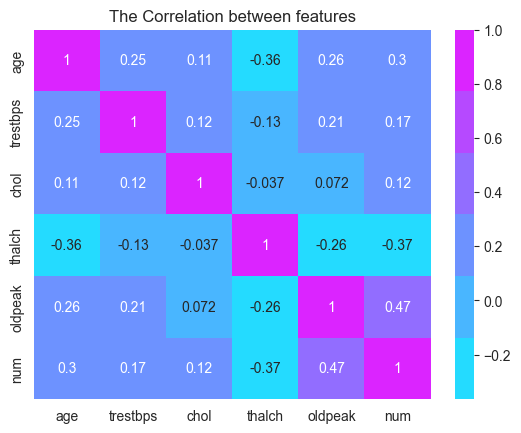

In [405]:
g=sns.heatmap(uci_imputed.corr(numeric_only=True),annot=True,cmap=cool_palette)
g.set_title("The Correlation between features")
plt.show()

# Data Analysis

In [406]:
uci_imputed.head()

,sex,cp,fbs,restecg,exang,slope,thal,ca,age,trestbps,chol,thalch,oldpeak,num
1,Male,atypical angina,False,normal,False,upsloping,normal,0.0,42,120.000000,295.0,162.000000,0.000000,0
2,Female,atypical angina,False,normal,False,upsloping,normal,0.0,47,140.000000,257.0,135.000000,1.000000,0
3,Male,non-anginal,False,st-t abnormality,False,flat,normal,0.0,35,132.316891,161.0,136.813433,0.871192,0
5,Male,asymptomatic,True,lv hypertrophy,True,upsloping,reversable defect,3.0,63,130.000000,330.0,132.000000,1.800000,1
6,Female,asymptomatic,True,lv hypertrophy,True,flat,fixed defect,2.0,58,170.000000,225.0,146.000000,2.800000,1


### How many people have heart disease?

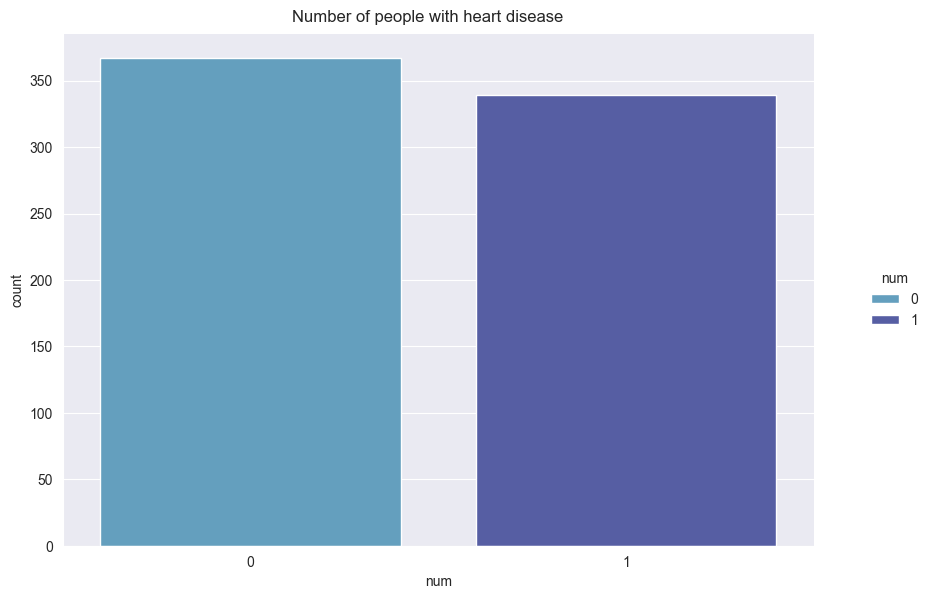

In [407]:
g=sns.catplot(x="num",hue="num",data=uci_imputed,palette=icefire_palette,kind="count")
g.fig.suptitle("Number of people with heart disease",y=1.01)
g.figure.set_size_inches(10,6)
plt.show()

### Which gender has the most number of heart disease?

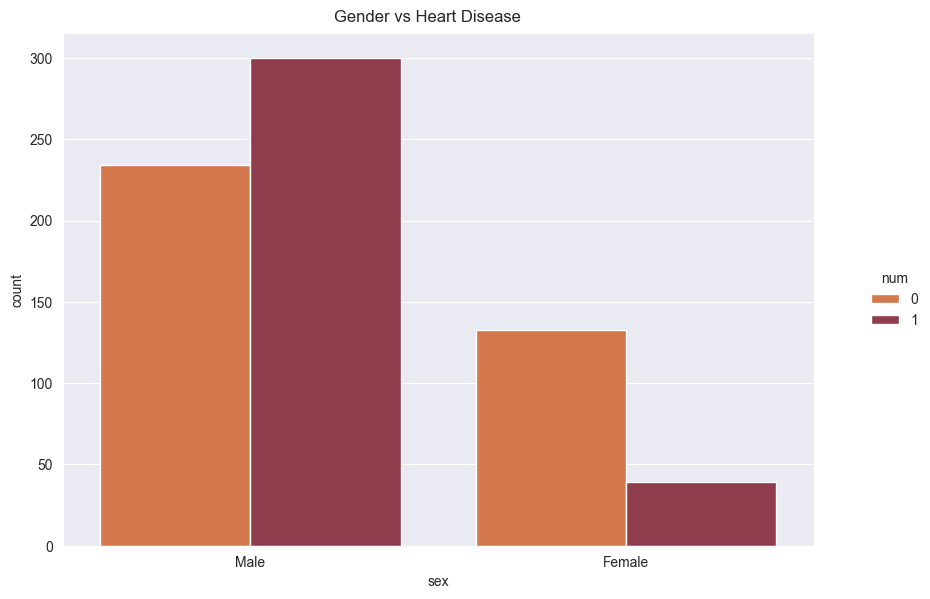

In [408]:
g=sns.catplot(x="sex",hue="num",data=uci_imputed,palette=icefire_r_palette,kind="count")
g.fig.suptitle("Gender vs Heart Disease",y=1.01)
g.figure.set_size_inches(10,6)
plt.show()

### Which chest pain type (cp) has the most number of heart Disease?

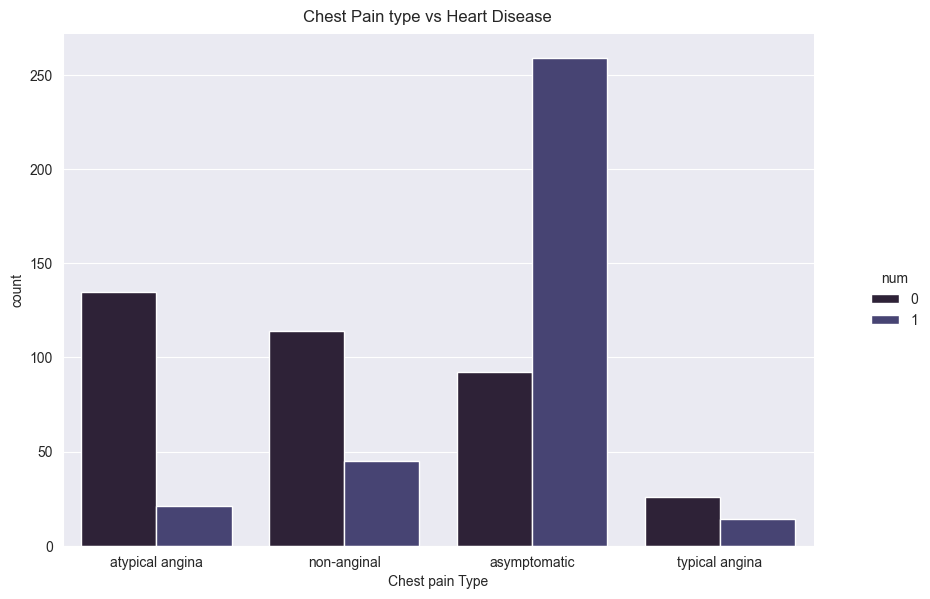

In [409]:
g=sns.catplot(x="cp",hue="num",data=uci_imputed,palette=mako_palette,kind="count")
g.fig.suptitle("Chest Pain type vs Heart Disease",y=1.01)
g.figure.set_size_inches(10,6)
g.set(xlabel="Chest pain Type")
plt.show()

### Is having fasting blood sugar > 120 mg/dl can affect on having heart disease?

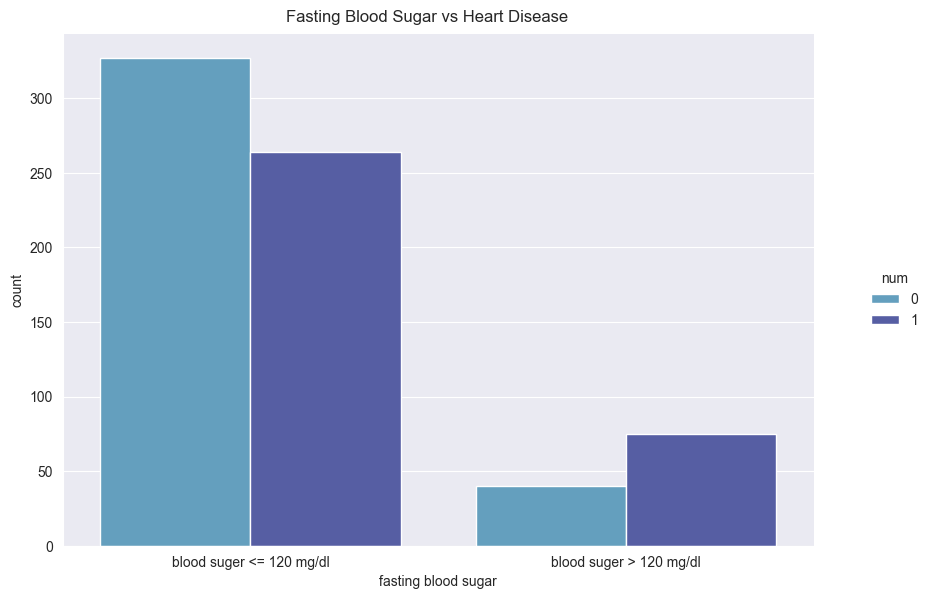

In [410]:
g=sns.catplot(x="fbs",hue="num",data=uci_imputed,palette=icefire_palette,kind="count")
g.fig.suptitle("Fasting Blood Sugar vs Heart Disease",y=1.01)
g.figure.set_size_inches(10,6)
g.set(xlabel="fasting blood sugar")
plt.xticks(ticks=["False","True"],labels=["blood suger <= 120 mg/dl","blood suger > 120 mg/dl"])
plt.show()

### What is the relation between resting electrocardiographic results and having Heart Disease?

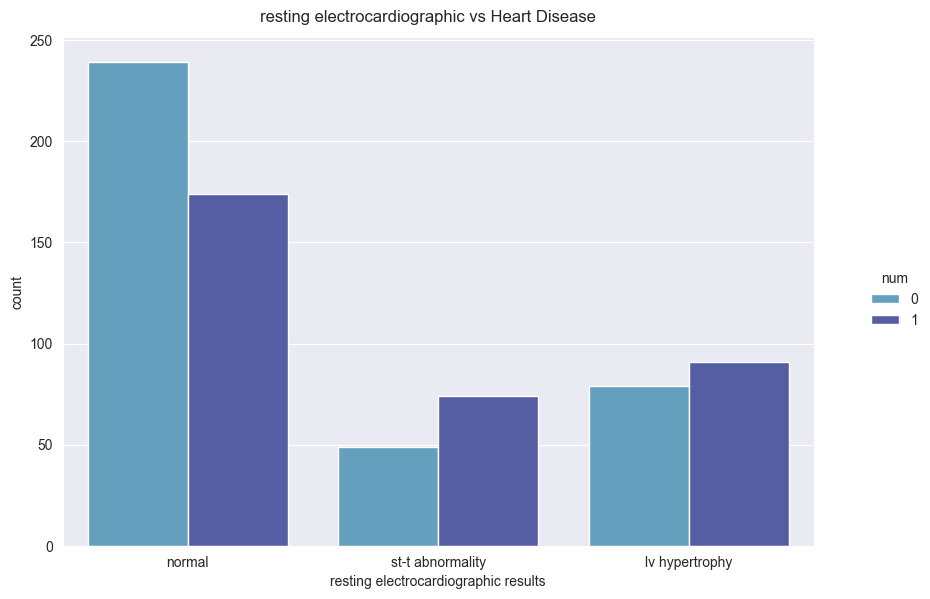

In [411]:
g=sns.catplot(x="restecg",hue="num",data=uci_imputed,palette=icefire_palette,kind="count")
g.fig.suptitle("resting electrocardiographic vs Heart Disease",y=1.01)
g.figure.set_size_inches(10,6)
g.set(xlabel="resting electrocardiographic results")
plt.show()

### what is the reltionship between having heart disease and other numeric features

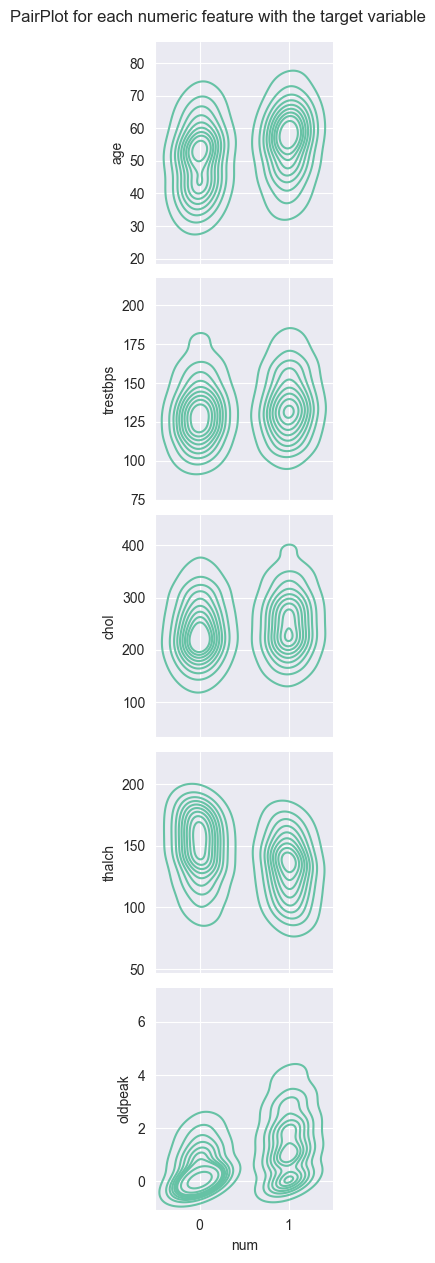

In [412]:
g=sns.pairplot(data=uci_imputed,x_vars=["num"],y_vars=["age","trestbps","chol","thalch","oldpeak"],palette=plasma_palette,kind="kde")
g.fig.suptitle("PairPlot for each numeric feature with the target variable",y=1.01)
plt.show()

# Feature Enginearing

In [413]:
uci_imputed.head()

,sex,cp,fbs,restecg,exang,slope,thal,ca,age,trestbps,chol,thalch,oldpeak,num
1,Male,atypical angina,False,normal,False,upsloping,normal,0.0,42,120.000000,295.0,162.000000,0.000000,0
2,Female,atypical angina,False,normal,False,upsloping,normal,0.0,47,140.000000,257.0,135.000000,1.000000,0
3,Male,non-anginal,False,st-t abnormality,False,flat,normal,0.0,35,132.316891,161.0,136.813433,0.871192,0
5,Male,asymptomatic,True,lv hypertrophy,True,upsloping,reversable defect,3.0,63,130.000000,330.0,132.000000,1.800000,1
6,Female,asymptomatic,True,lv hypertrophy,True,flat,fixed defect,2.0,58,170.000000,225.0,146.000000,2.800000,1


In [414]:
le=LabelEncoder()
uci_imputed["sex"]=le.fit_transform(uci_imputed["sex"].values.reshape(-1,1))
uci_imputed["fbs"]=le.fit_transform(uci_imputed["fbs"].values.reshape(-1,1))
uci_imputed["exang"]=le.fit_transform(uci_imputed["exang"].values.reshape(-1,1))

In [415]:
uci_imputed.head()

,sex,cp,fbs,restecg,exang,slope,thal,ca,age,trestbps,chol,thalch,oldpeak,num
1,1,atypical angina,0,normal,0,upsloping,normal,0.0,42,120.000000,295.0,162.000000,0.000000,0
2,0,atypical angina,0,normal,0,upsloping,normal,0.0,47,140.000000,257.0,135.000000,1.000000,0
3,1,non-anginal,0,st-t abnormality,0,flat,normal,0.0,35,132.316891,161.0,136.813433,0.871192,0
5,1,asymptomatic,1,lv hypertrophy,1,upsloping,reversable defect,3.0,63,130.000000,330.0,132.000000,1.800000,1
6,0,asymptomatic,1,lv hypertrophy,1,flat,fixed defect,2.0,58,170.000000,225.0,146.000000,2.800000,1


In [416]:
cp_df=pd.get_dummies(uci_imputed["cp"],prefix="cp",dtype="int")
restecg_df=pd.get_dummies(uci_imputed["restecg"],prefix="restecg",dtype="int")
slope_df=pd.get_dummies(uci_imputed["slope"],prefix="slope",dtype="int")
thal_df=pd.get_dummies(uci_imputed["thal"],prefix="thal",dtype="int")

In [417]:
uci=pd.concat([uci_imputed,cp_df,restecg_df,slope_df,thal_df],axis=1)

In [418]:
uci.head()

,sex,cp,fbs,restecg,exang,slope,thal,ca,age,trestbps,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
1,1,atypical angina,0,normal,0,upsloping,normal,0.0,42,120.000000,...,0,0,1,0,0,0,1,0,1,0
2,0,atypical angina,0,normal,0,upsloping,normal,0.0,47,140.000000,...,0,0,1,0,0,0,1,0,1,0
3,1,non-anginal,0,st-t abnormality,0,flat,normal,0.0,35,132.316891,...,0,0,0,1,0,1,0,0,1,0
5,1,asymptomatic,1,lv hypertrophy,1,upsloping,reversable defect,3.0,63,130.000000,...,0,1,0,0,0,0,1,0,0,1
6,0,asymptomatic,1,lv hypertrophy,1,flat,fixed defect,2.0,58,170.000000,...,0,1,0,0,0,1,0,1,0,0


In [419]:
uci.drop(["cp","restecg","slope","thal"],axis=1,inplace=True)

In [420]:
uci.head()

,sex,fbs,exang,ca,age,trestbps,chol,thalch,oldpeak,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
1,1,0,0,0.0,42,120.000000,295.0,162.000000,0.000000,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,0,0.0,47,140.000000,257.0,135.000000,1.000000,0,...,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0.0,35,132.316891,161.0,136.813433,0.871192,0,...,0,0,0,1,0,1,0,0,1,0
5,1,1,1,3.0,63,130.000000,330.0,132.000000,1.800000,1,...,0,1,0,0,0,0,1,0,0,1
6,0,1,1,2.0,58,170.000000,225.0,146.000000,2.800000,1,...,0,1,0,0,0,1,0,1,0,0


# Standrization

In [421]:
X=uci.drop("num",axis=1).values
y=uci["num"].values

In [422]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [423]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((564, 22), (142, 22), (564,), (142,))

In [424]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)